### Time Series

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
%matplotlib inline

In [2]:
%matplotlib inline # 선명하게 볼수있음

UsageError: unrecognized arguments: # 선명하게 볼수있음


In [3]:
dates = pd.date_range('2016-05-01', '2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [4]:
tmp1 = pd.Series([90,92,82,85,97,84,78],index=dates)
tmp1


2016-05-01    90
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [5]:
tmp2 = pd.Series(np.random.randint(60,100,size=7),index=dates)
tmp2

2016-05-01    78
2016-05-02    73
2016-05-03    91
2016-05-04    76
2016-05-05    74
2016-05-06    60
2016-05-07    99
Freq: D, dtype: int32

In [6]:
# tmp1, tmp2 이용해서 dataframe 만들기
exam = pd.DataFrame({
    'Math' : tmp1,
    'Philosophy' : tmp2
    })
exam

,Math,Philosophy
2016-05-01,90,78
2016-05-02,92,73
2016-05-03,82,91
2016-05-04,85,76
2016-05-05,97,74
2016-05-06,84,60
2016-05-07,78,99


In [7]:
# 2016년 5월 5일 점수만 보기
exam.loc['2016-05-05']

Math          97
Philosophy    74
Name: 2016-05-05 00:00:00, dtype: int64

In [8]:
# 5/4 5/6 5/7 의 철학 점수만 보기
#exam.loc[['2016-05-04','2016-05-06','2016-05-07'],['Philosophy']]
exam['Philosophy'][[3,5,6]]

2016-05-04    76
2016-05-06    60
2016-05-07    99
Name: Philosophy, dtype: int32

In [9]:
# 1.수학점수와 철학점수의 차 구하기
# 2.새로운 열에 추가
exam['difference'] = exam['Math'] - exam['Philosophy']
exam

,Math,Philosophy,difference
2016-05-01,90,78,12
2016-05-02,92,73,19
2016-05-03,82,91,-9
2016-05-04,85,76,9
2016-05-05,97,74,23
2016-05-06,84,60,24
2016-05-07,78,99,-21


In [10]:
#컬럼 이름 바꾸기
exam.rename(columns={'Math':'Mathmatics','difference':'diff'},inplace=True)
exam

,Mathmatics,Philosophy,diff
2016-05-01,90,78,12
2016-05-02,92,73,19
2016-05-03,82,91,-9
2016-05-04,85,76,9
2016-05-05,97,74,23
2016-05-06,84,60,24
2016-05-07,78,99,-21


In [11]:
# exam에서 'diff' 칼럼을 지워주세요
exam.drop('diff',axis=1,inplace=True)
exam

,Mathmatics,Philosophy
2016-05-01,90,78
2016-05-02,92,73
2016-05-03,82,91
2016-05-04,85,76
2016-05-05,97,74
2016-05-06,84,60
2016-05-07,78,99


In [12]:
# and , or 중 하나 사용(&,|)
# 5/3 5/4 의 시험 점수를 데이터 프레임 형태로 가져오세요
exam[(exam.index=='2016-05-03')|(exam.index=='2016-05-04')]

,Mathmatics,Philosophy
2016-05-03,82,91
2016-05-04,85,76


In [13]:
# and , or 중 하나 사용(&,|)\
# 수학점수가 85점 이상
# 5/5 이전의 날짜
exam[(exam.Mathmatics >85)&(exam.index<'2016-05-05')]

,Mathmatics,Philosophy
2016-05-01,90,78
2016-05-02,92,73


<AxesSubplot:>

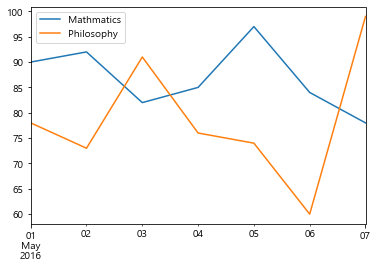

In [14]:
exam.plot()

<AxesSubplot:title={'center':'Score'}>

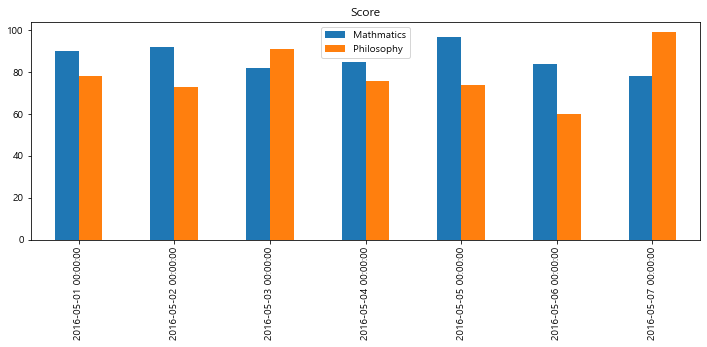

In [15]:
# 바 차트로 표현
exam.plot(title='Score',figsize=(12,4),kind='bar')
#plt.xlabel('Date')
#plt.ylabel('Score')

#### IMDB 영화리뷰데이터셋을 인터넷에서 불러오기

In [16]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [17]:
movies.shape

(979, 6)

**우리의 목표 : 영화 상영시간이 200분 이상인 영화만 필터팅해보자**

In [18]:
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [19]:
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [20]:
#데이터 프레임을 만들기전에 리스트를 Series 로 변환
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [21]:
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


**목표 : 이번에는 장르가 'Crime'또는 'Drama' 또는 'Action'인 영화리스트 보기!**

In [22]:
movies[(movies.genre =='Crime')|(movies.genre =='Drama')|(movies.genre =='Action')]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [23]:
#isin
movies[movies.genre.isin(['Crime','Drama','Action'])].head(6)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [24]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry',index_col='country')
drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America
Vietnam,111,2,1,2.0,Asia
Yemen,6,0,0,0.1,Asia


In [25]:
drinks['total'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']

In [26]:
drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total
country,,,,,,
Afghanistan,0,0,0,0.0,Asia,0
Albania,89,132,54,4.9,Europe,275
Algeria,25,0,14,0.7,Africa,39
Andorra,245,138,312,12.4,Europe,695
Angola,217,57,45,5.9,Africa,319
...,...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America,436
Vietnam,111,2,1,2.0,Asia,114
Yemen,6,0,0,0.1,Asia,6


In [27]:
drinks[(drinks.total>100)]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total
country,,,,,,
Albania,89,132,54,4.9,Europe,275
Andorra,245,138,312,12.4,Europe,695
Angola,217,57,45,5.9,Africa,319
Antigua & Barbuda,102,128,45,4.9,North America,275
Argentina,193,25,221,8.3,South America,439
...,...,...,...,...,...,...
USA,249,158,84,8.7,North America,491
Uruguay,115,35,220,6.6,South America,370
Uzbekistan,25,101,8,2.4,Asia,134


<AxesSubplot:xlabel='country'>

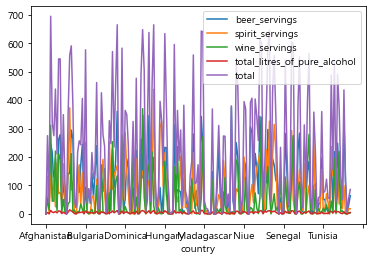

In [28]:
drinks.plot()

In [29]:
a = drinks['total'].tail(6)
a

country
Vanuatu       50
Venezuela    436
Vietnam      114
Yemen          6
Zambia        55
Zimbabwe      86
Name: total, dtype: int64

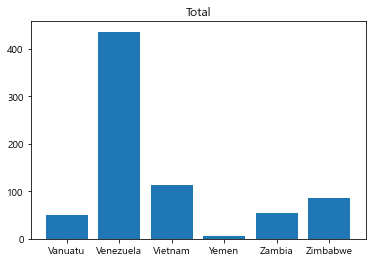

In [30]:
x = a.index
y = a.values
plt.bar(x,y)
plt.title('Total')
#plt.xlabel('total')
plt.show()

**전체 데이터의 맥주 평균 소비량**

In [31]:
drinks.beer_servings.mean()

106.16062176165804

**아프리카 대륙의 평균 소비량**

In [32]:
drinks[drinks.continent=='Africa'].wine_servings.mean()

16.264150943396228

**각 대륙별 맥주 평균 소비량**

In [33]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [34]:
# 각 대륙별 맥주 최고 소비량
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [35]:
# 다양한 통계치를 한꺼번에!
drinks.groupby('continent').beer_servings.agg(['count','mean','min','max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [36]:
%matplotlib inline

<AxesSubplot:xlabel='continent'>

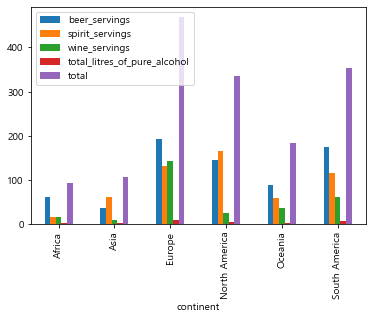

In [37]:
drinks.groupby('continent').mean().plot(kind='bar')